<a href="https://colab.research.google.com/github/razzlestorm/DS-Unit-2-Regression-Classification/blob/master/module4/Jerimiah_Willhite_assignment_regression_classification_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 4

## Assignment

- [ ] Watch Aaron Gallant's [video #1](https://www.youtube.com/watch?v=pREaWFli-5I) (12 minutes) & [video #2](https://www.youtube.com/watch?v=bDQgVt4hFgY) (9 minutes) to learn about the mathematics of Logistic Regression.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Do one-hot encoding. (Remember it may not work with high cardinality categoricals.)
- [ ] Use scikit-learn for logistic regression.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your coefficients.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.


## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Clean the data. For ideas, refer to [The Quartz guide to bad data](https://github.com/Quartz/bad-data-guide),  a "reference to problems seen in real-world data along with suggestions on how to resolve them." One of the issues is ["Zeros replace missing values."](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values)
- [ ] Make exploratory visualizations.
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this problem, you may want to use the parameter `logistic=True`

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from the previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```

#### Pipelines

[Scikit-Learn User Guide](https://scikit-learn.org/stable/modules/compose.html) explains why pipelines are useful, and demonstrates how to use them:

> Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:
> - **Convenience and encapsulation.** You only have to call fit and predict once on your data to fit a whole sequence of estimators.
> - **Joint parameter selection.** You can grid search over parameters of all estimators in the pipeline at once.
> - **Safety.** Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

### Reading
- [ ] [How (and why) to create a good validation set](https://www.fast.ai/2017/11/13/validation-sets/)
- [ ] [Always start with a stupid model, no exceptions](https://blog.insightdatascience.com/always-start-with-a-stupid-model-no-exceptions-3a22314b9aaa)
- [ ] [Statistical Modeling: The Two Cultures](https://projecteuclid.org/download/pdf_1/euclid.ss/1009213726)
- [ ] [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapters 1-3, for more math & theory, but in an accessible, readable way (without an excessive amount of formulas or academic pre-requisites).



In [0]:
# If you're in Colab...
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module4')

In [0]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import pandas as pd

train_features = pd.read_csv('../data/tanzania/train_features.csv')
train_labels = pd.read_csv('../data/tanzania/train_labels.csv')
test_features = pd.read_csv('../data/tanzania/test_features.csv')
sample_submission = pd.read_csv('../data/tanzania/sample_submission.csv')

assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
assert sample_submission.shape == (14358, 2)

In [4]:
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [11]:
#Do train/validate/test split with the Tanzania Waterpumps data.
from sklearn.model_selection import train_test_split

X_train = train_features
y_train = train_labels['status_group']

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    train_size = 0.80, test_size=0.20,
    stratify=y_train, random_state=142
)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47520, 40), (11880, 40), (47520,), (11880,))

In [12]:
#Get Baseline
y_train.value_counts(normalize=True)

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

In [14]:
#Checking for Nulls
X_train.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    2882
gps_height                   0
installer                 2889
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 295
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            2679
recorded_by                  0
scheme_management         3122
scheme_name              22536
permit                    2442
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [36]:
#getting a purely numeric dataset (no nulls is nice)
X_train_numeric = X_train.select_dtypes('number')
X_val_numeric = X_val.select_dtypes('number')

X_train_numeric.shape, X_val_numeric.shape

((47520, 10), (11880, 10))

In [17]:
#Use scikit-learn for logistic regression.
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(n_jobs = -1)

model.fit(X_train_numeric, y_train)

model.score(X_val_numeric, y_val)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.5481481481481482

In [18]:
#check original dataset for features to include
X_train.describe(exclude="number").T.sort_values(by = 'unique')

,count,unique,top,freq
recorded_by,47520,1,GeoData Consultants Ltd,47520
public_meeting,44841,2,True,40820
permit,45078,2,True,31179
source_class,47520,3,groundwater,36607
management_group,47520,5,user-group,42019
quantity_group,47520,5,enough,26555
quantity,47520,5,enough,26555
waterpoint_type_group,47520,6,communal standpipe,27744
quality_group,47520,6,good,40692
payment_type,47520,7,never pay,20213


In [19]:
X_train['management_group'].value_counts(normalize=True)

user-group    0.884238
commercial    0.060901
parastatal    0.029945
other         0.015762
unknown       0.009154
Name: management_group, dtype: float64

In [58]:
X_train['payment'].value_counts(normalize=True)

never pay                0.425358
pay per bucket           0.150694
pay monthly              0.140215
unknown                  0.137879
pay when scheme fails    0.066435
pay annually             0.061532
other                    0.017887
Name: payment, dtype: float64

In [59]:
X_train['payment_type'].value_counts(normalize=True)

never pay     0.425358
per bucket    0.150694
monthly       0.140215
unknown       0.137879
on failure    0.066435
annually      0.061532
other         0.017887
Name: payment_type, dtype: float64

In [47]:
X_train['waterpoint_type_group'].value_counts(normalize=True)

communal standpipe    0.583838
hand pump             0.294823
other                 0.106229
improved spring       0.012984
cattle trough         0.002020
dam                   0.000105
Name: waterpoint_type_group, dtype: float64

In [28]:
X_train['quality_group'].value_counts(normalize=True)

good        0.856313
salty       0.086279
unknown     0.032071
milky       0.013615
colored     0.007849
fluoride    0.003872
Name: quality_group, dtype: float64

In [22]:
X_train['scheme_management'].value_counts(normalize=True)

VWC                 0.663836
WUG                 0.092572
Water authority     0.057097
WUA                 0.052525
Water Board         0.049349
Parastatal          0.030272
Private operator    0.018965
Company             0.018852
Other               0.013717
SWC                 0.001599
Trust               0.001216
Name: scheme_management, dtype: float64

In [66]:
X_train['extraction_type'].value_counts(normalize=True) 


gravity                      0.450842
nira/tanira                  0.137563
other                        0.108039
submersible                  0.079945
swn 80                       0.062058
mono                         0.048211
india mark ii                0.040215
afridev                      0.029882
ksb                          0.023779
other - rope pump            0.007323
other - swn 81               0.004104
windmill                     0.001957
india mark iii               0.001705
cemo                         0.001515
other - play pump            0.001410
walimi                       0.000842
climax                       0.000568
other - mkulima/shinyanga    0.000042
Name: extraction_type, dtype: float64

In [67]:
X_train['extraction_type_class'].value_counts(normalize=True) 

gravity         0.450842
handpump        0.277820
other           0.108039
submersible     0.103725
motorpump       0.050295
rope pump       0.007323
wind-powered    0.001957
Name: extraction_type_class, dtype: float64

In [68]:
X_train['extraction_type_group'].value_counts(normalize=True) 

gravity            0.450842
nira/tanira        0.137563
other              0.108039
submersible        0.103725
swn 80             0.062058
mono               0.048211
india mark ii      0.040215
afridev            0.029882
rope pump          0.007323
other handpump     0.006397
other motorpump    0.002083
wind-powered       0.001957
india mark iii     0.001705
Name: extraction_type_group, dtype: float64

In [23]:
X_train['management'].value_counts(normalize=True)

vwc                 0.682218
wug                 0.108965
water board         0.049558
wua                 0.043497
private operator    0.032934
parastatal          0.029945
water authority     0.015404
other               0.014289
company             0.011322
unknown             0.009154
other - school      0.001473
trust               0.001242
Name: management, dtype: float64

In [38]:
#making a copy and adding the status groups
train = X_train.copy()
train['status_group'] = y_train

train.groupby('waterpoint_type_group')['status_group'].value_counts(normalize=True)

waterpoint_type_group  status_group           
cattle trough          functional                 0.708333
                       non functional             0.270833
                       functional needs repair    0.020833
communal standpipe     functional                 0.575548
                       non functional             0.340146
                       functional needs repair    0.084307
dam                    functional                 1.000000
hand pump              functional                 0.618986
                       non functional             0.322341
                       functional needs repair    0.058672
improved spring        functional                 0.716370
                       non functional             0.173420
                       functional needs repair    0.110211
other                  non functional             0.826664
                       functional                 0.129160
                       functional needs repair    0.044176
Name: sta

In [81]:
#Do one-hot encoding. (Remember it may not work with high cardinality categoricals.
#going to add these into the dataset and test after each one.
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

categorical_features = ['waterpoint_type_group', 'management', 'quality_group',
                        'scheme_management', 'payment', 'quantity', 'extraction_type',
                        'source_class', 'source_type', 'basin', 'region']
numeric_features = X_train.select_dtypes('number').columns.drop('id').tolist()
features = categorical_features + numeric_features

X_train_sub = X_train[features]
X_val_sub = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_sub)
X_val_encoded = encoder.transform(X_val_sub)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegressionCV(n_jobs = -1)

model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=-1, penalty='l2',
                     random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [82]:
#Get your validation accuracy score.
print(model.score(X_val_scaled, y_val))

0.7295454545454545


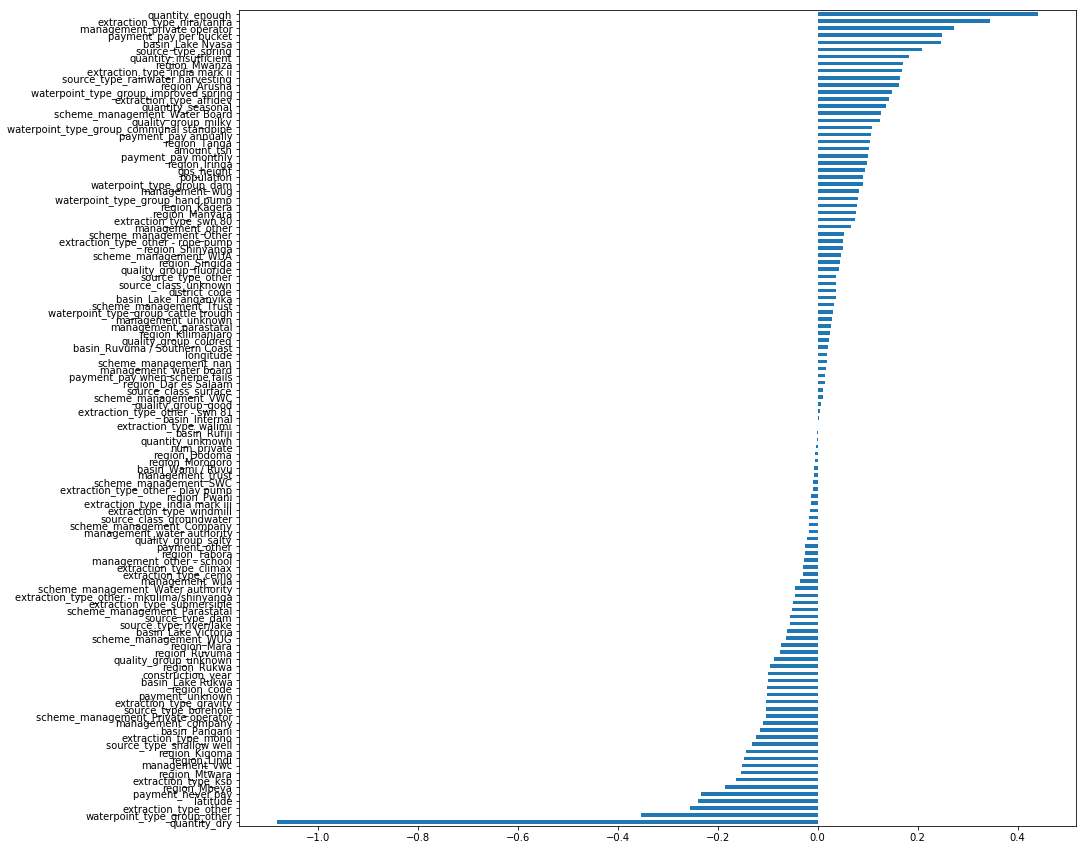

In [86]:
#Get and plot your coefficients.
import matplotlib.pyplot as plt


plotted_coef = pd.Series(
    model.coef_[0],
    X_train_encoded.columns
)

plt.figure(figsize=(15,15))

plotted_coef.sort_values().plot.barh();


In [0]:
#Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue Submit Predictions button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
X_test_subset = test_features[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)
assert all(X_test_encoded.columns == X_train_encoded.columns)

In [0]:
y_pred = model.predict(X_test_scaled)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-01.csv', index=False)
if in_colab:
  from google.colab import files
  files.download('submission-01.csv')

In [0]:
#Commit your notebook to your fork of the GitHub repo.
